In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("phishing_site_urls_dataset.csv")

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


Number of duplicate rows: 42086


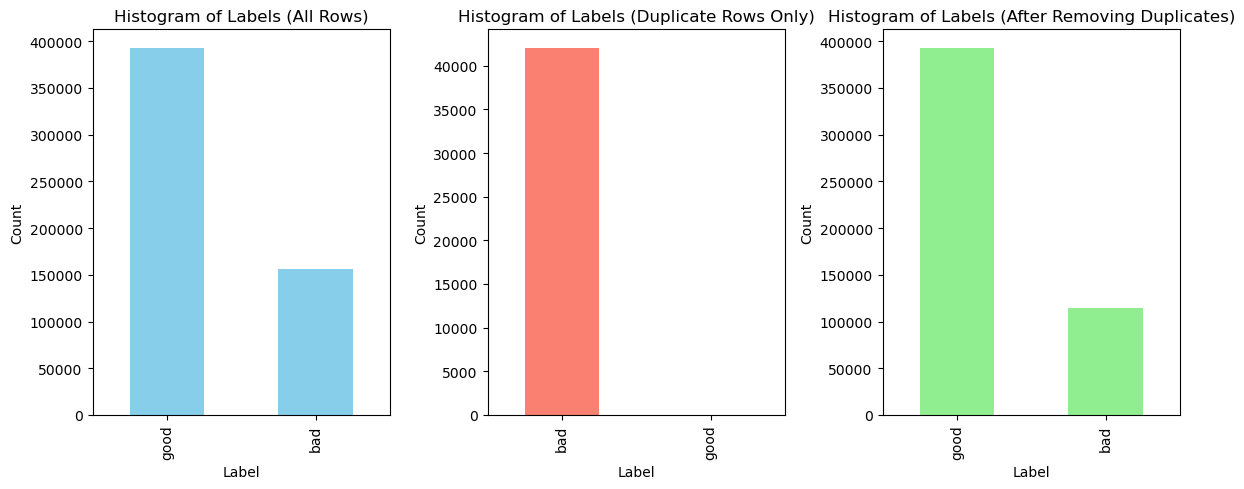

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("phishing_site_urls_dataset.csv")

# Find duplicate rows
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram before removing duplicates
plt.subplot(1, 3, 1)
df['Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Histogram of Labels (All Rows)")
plt.xlabel("Label")
plt.ylabel("Count")

# Histogram for duplicate rows only
plt.subplot(1, 3, 2)
duplicates['Label'].value_counts().plot(kind='bar', color='salmon')
plt.title("Histogram of Labels (Duplicate Rows Only)")
plt.xlabel("Label")
plt.ylabel("Count")

# Histogram after removing duplicates
plt.subplot(1, 3, 3)
df_cleaned['Label'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Histogram of Labels (After Removing Duplicates)")
plt.xlabel("Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [2]:
features_df=pd.read_csv("221IT085_URLfeaturedataset.csv")
features_df.head()

,full_url_length,hostname_length,ip_address_in_url,dot_count,hyphen_count,underscore_count,slash_count,question_mark_count,equal_count,at_count,...,dns_record_check,media_links_ratio,connection_errors_ratio,mx_servers_count,spf_record,domain_in_title,web_traffic,google_index,page_rank,Label
0,225,9,0,6,4,4,10,1,4,0,...,1,-1.0,-1.0,0,0,0,0,0,0,0
1,81,15,0,5,2,1,4,0,2,0,...,1,-1.0,-1.0,0,0,0,0,0,0,0
2,177,16,0,7,1,0,11,0,0,0,...,1,-1.0,-1.0,0,0,0,0,0,0,0
3,60,18,0,6,0,0,2,0,0,0,...,1,-1.0,-1.0,0,0,0,0,0,0,0
4,116,19,0,1,1,0,10,1,0,0,...,1,-1.0,-1.0,0,0,0,0,0,0,0


In [3]:
features_df.columns

Index(['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count',
       'hyphen_count', 'underscore_count', 'slash_count',
       'question_mark_count', 'equal_count', 'at_count',
       ...
       'dns_record_check', 'media_links_ratio', 'connection_errors_ratio',
       'mx_servers_count', 'spf_record', 'domain_in_title', 'web_traffic',
       'google_index', 'page_rank', 'Label'],
      dtype='object', length=116)

<Axes: >

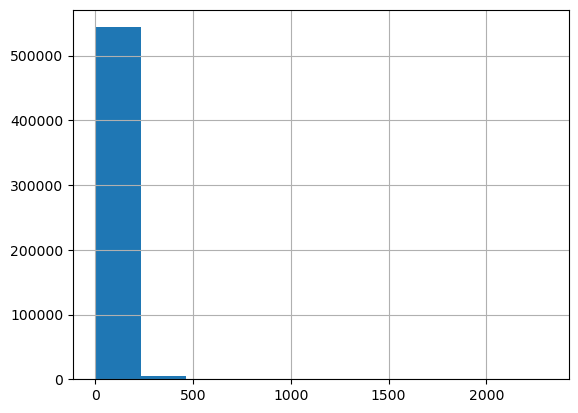

In [8]:
features_df['full_url_length'].hist()

<Axes: >

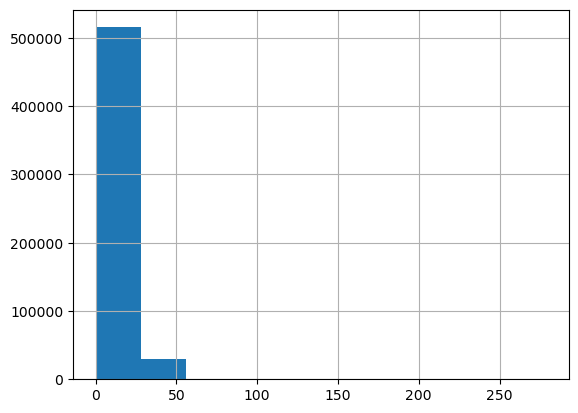

In [9]:
features_df['hostname_length'].hist()

<Axes: >

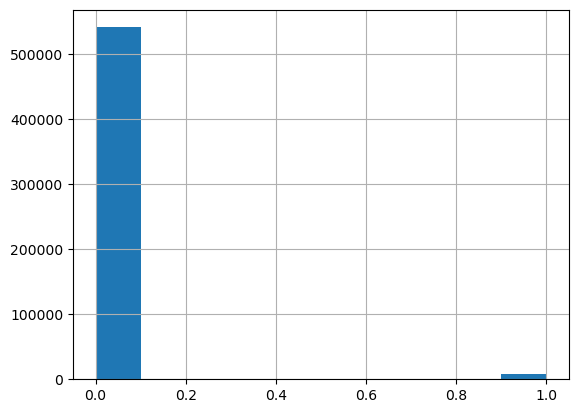

In [10]:
features_df['ip_address_in_url'].hist()

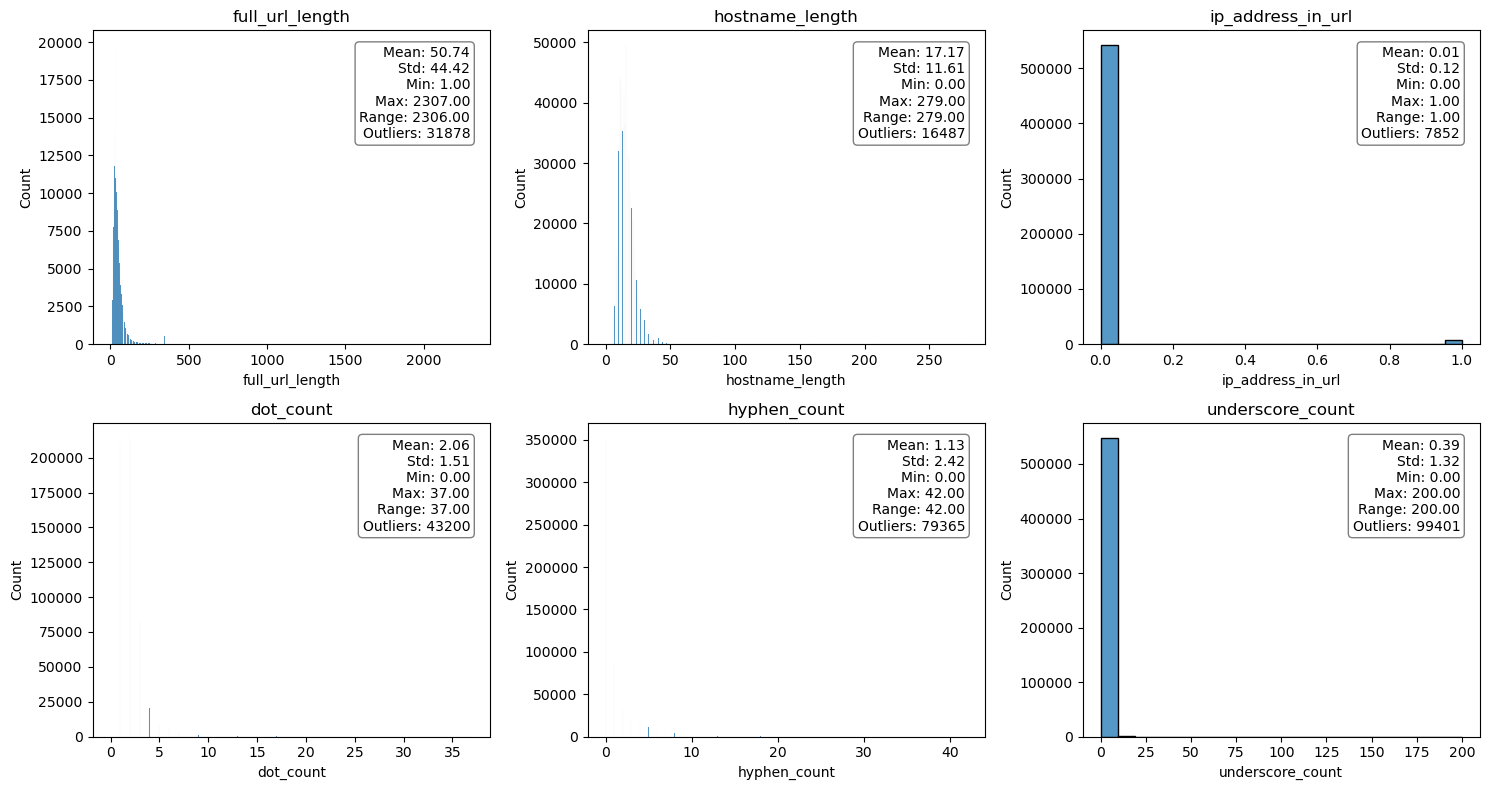

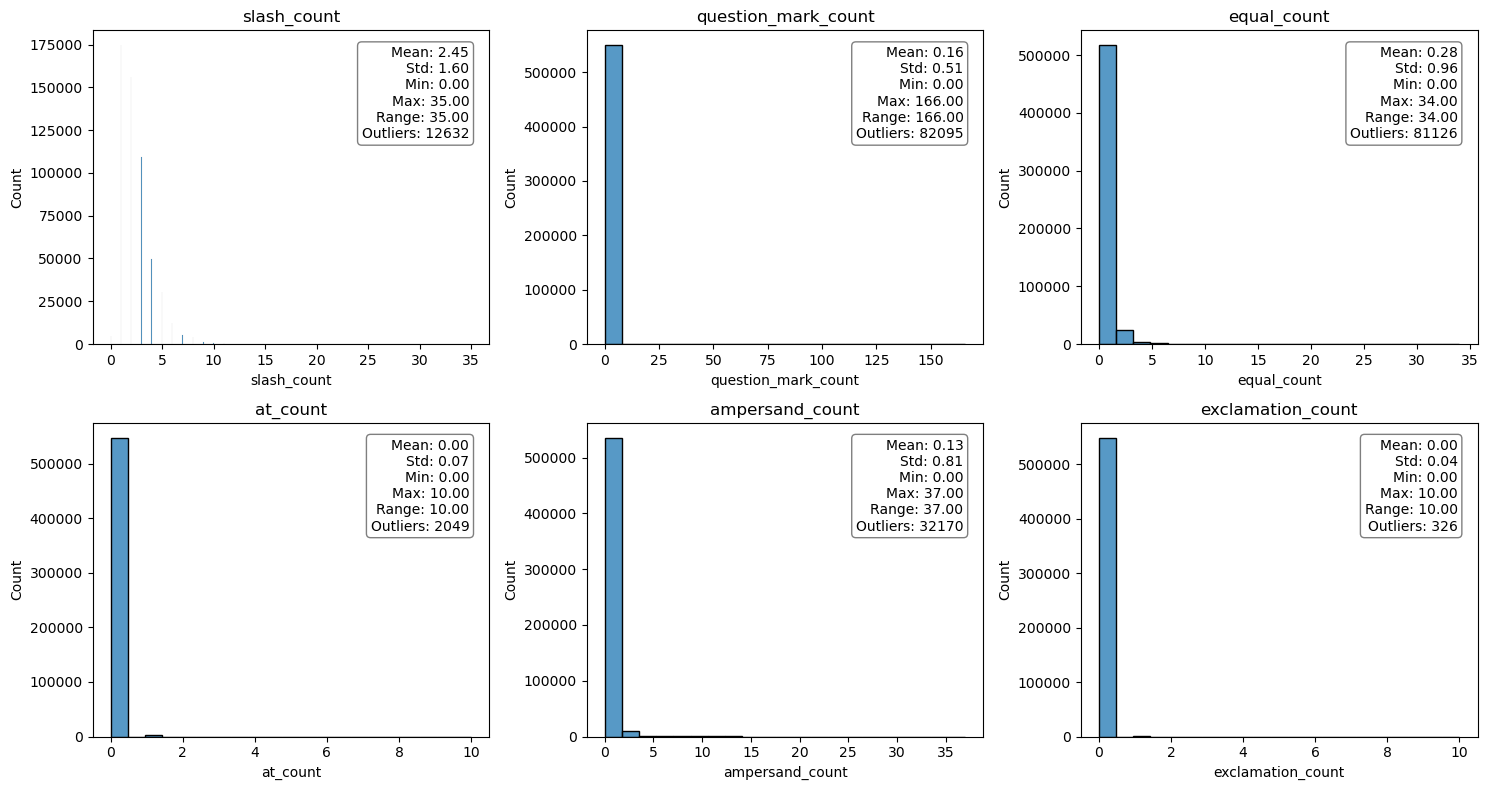

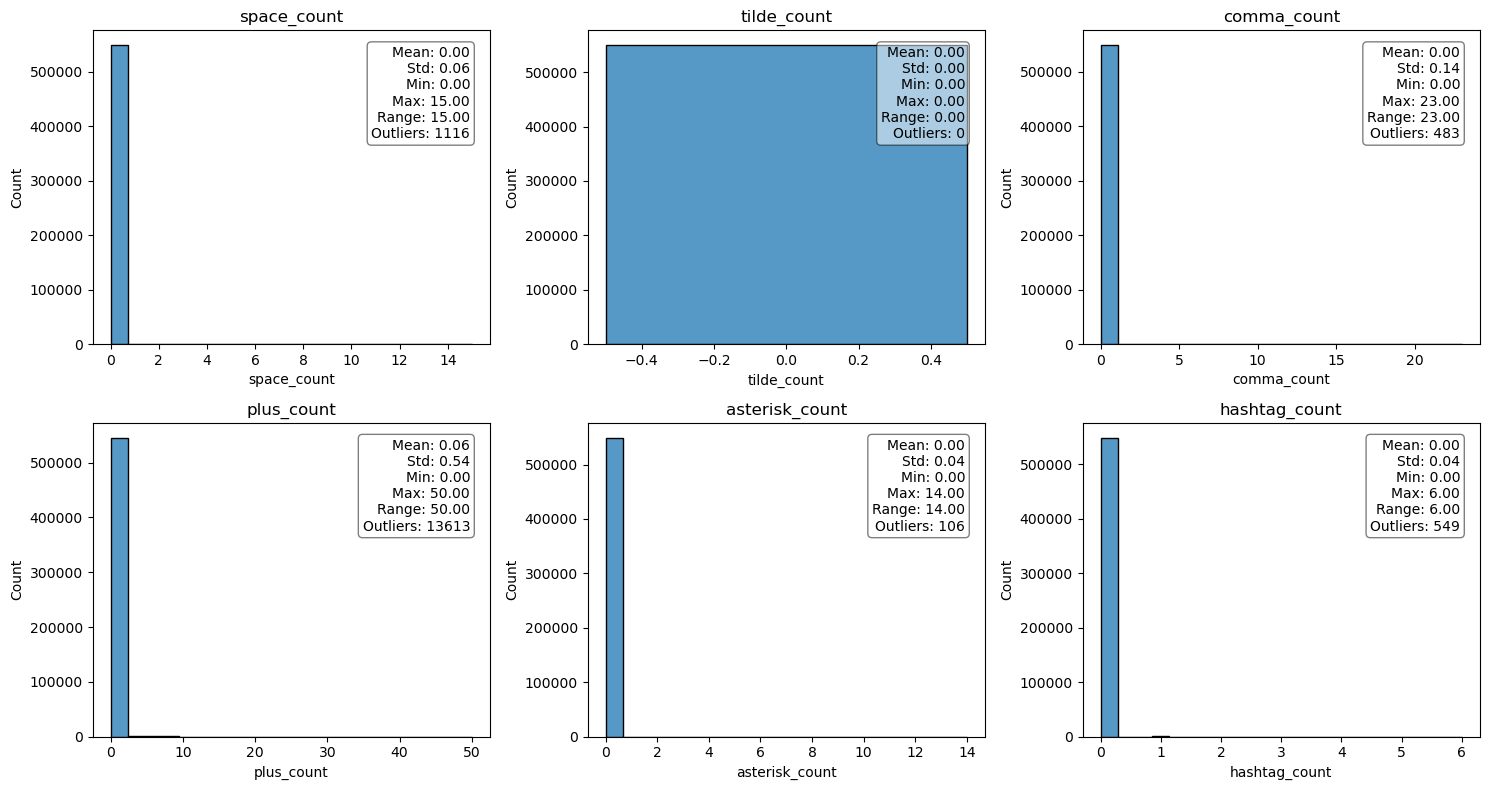

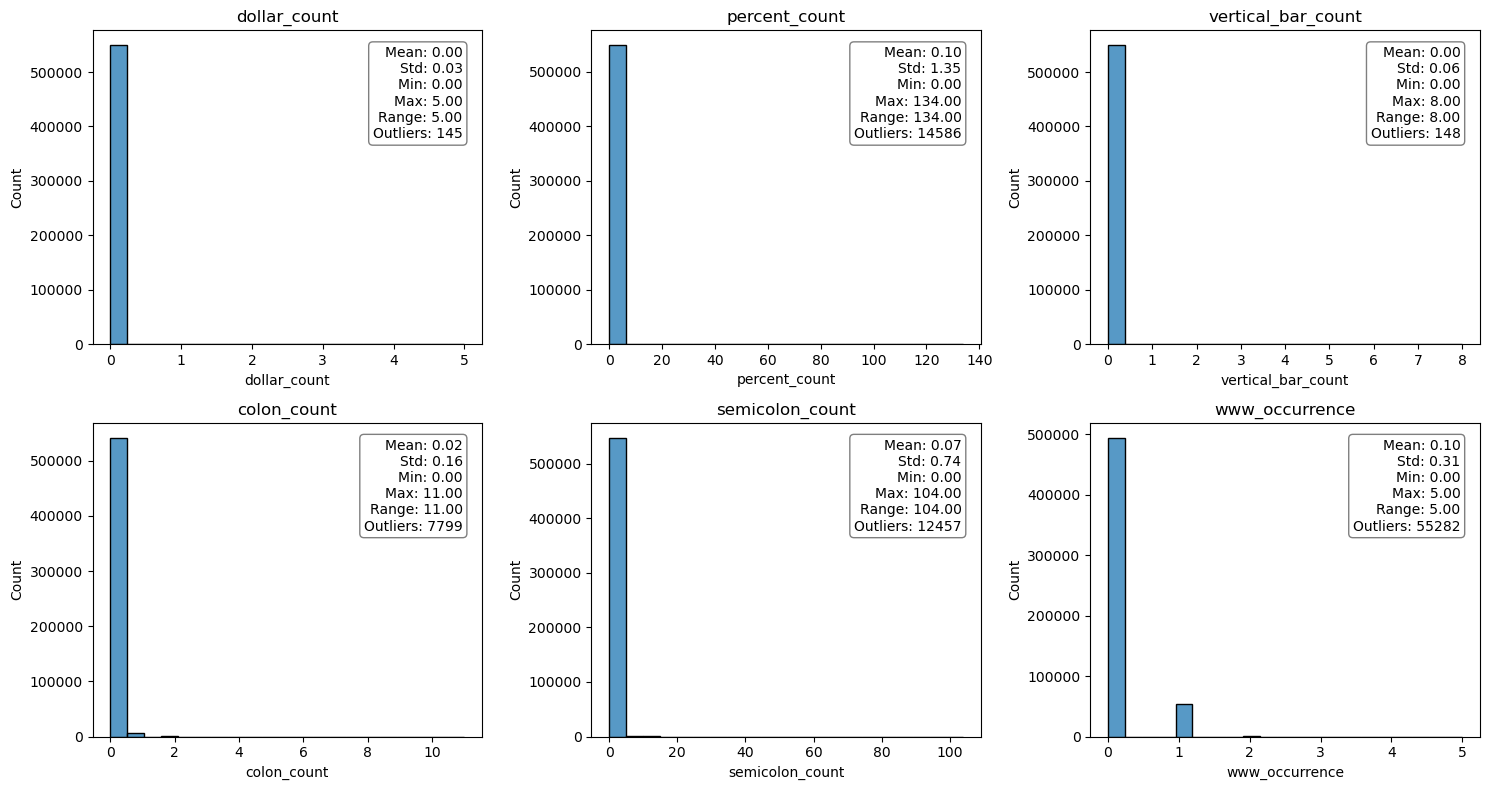

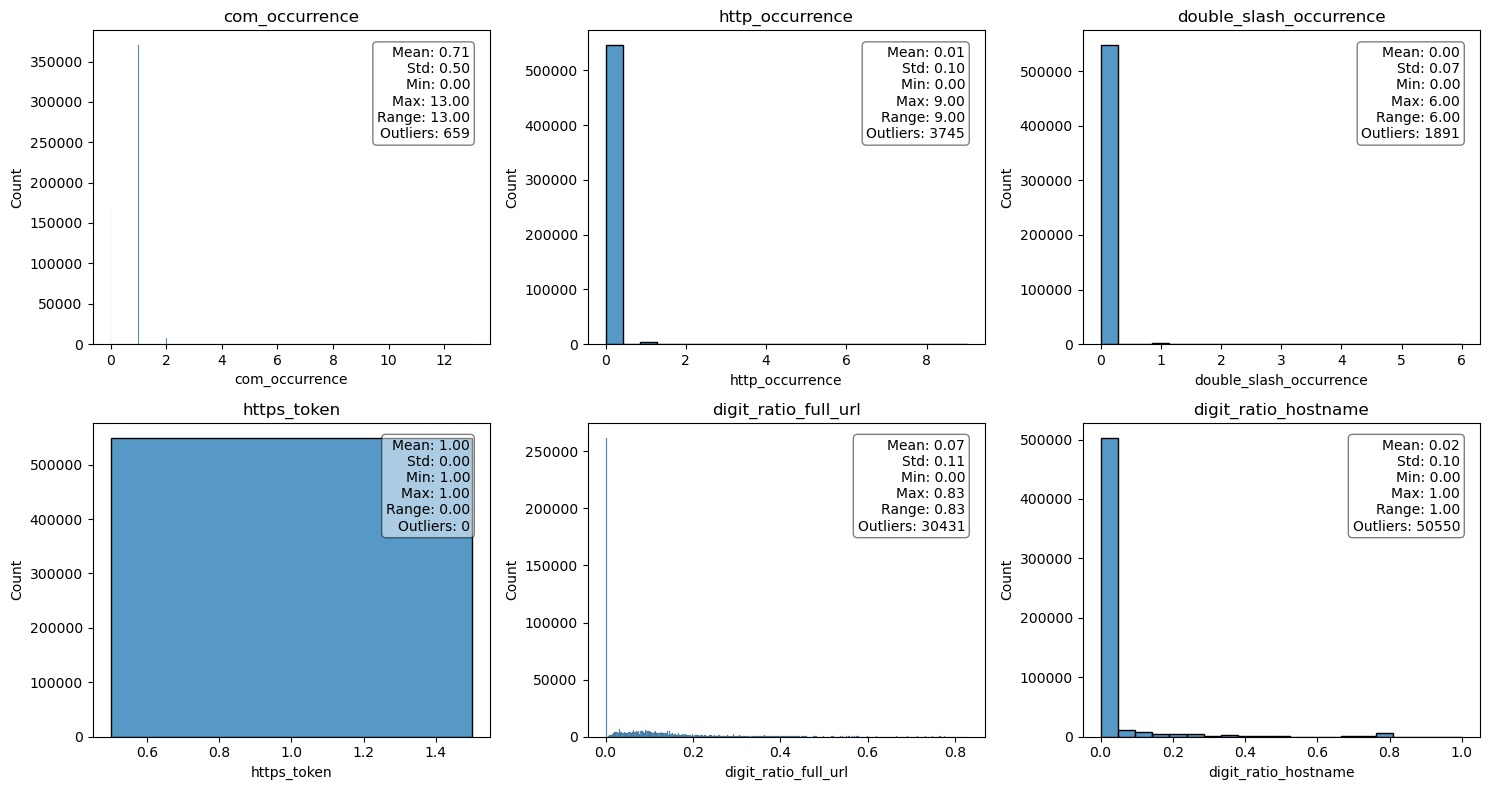

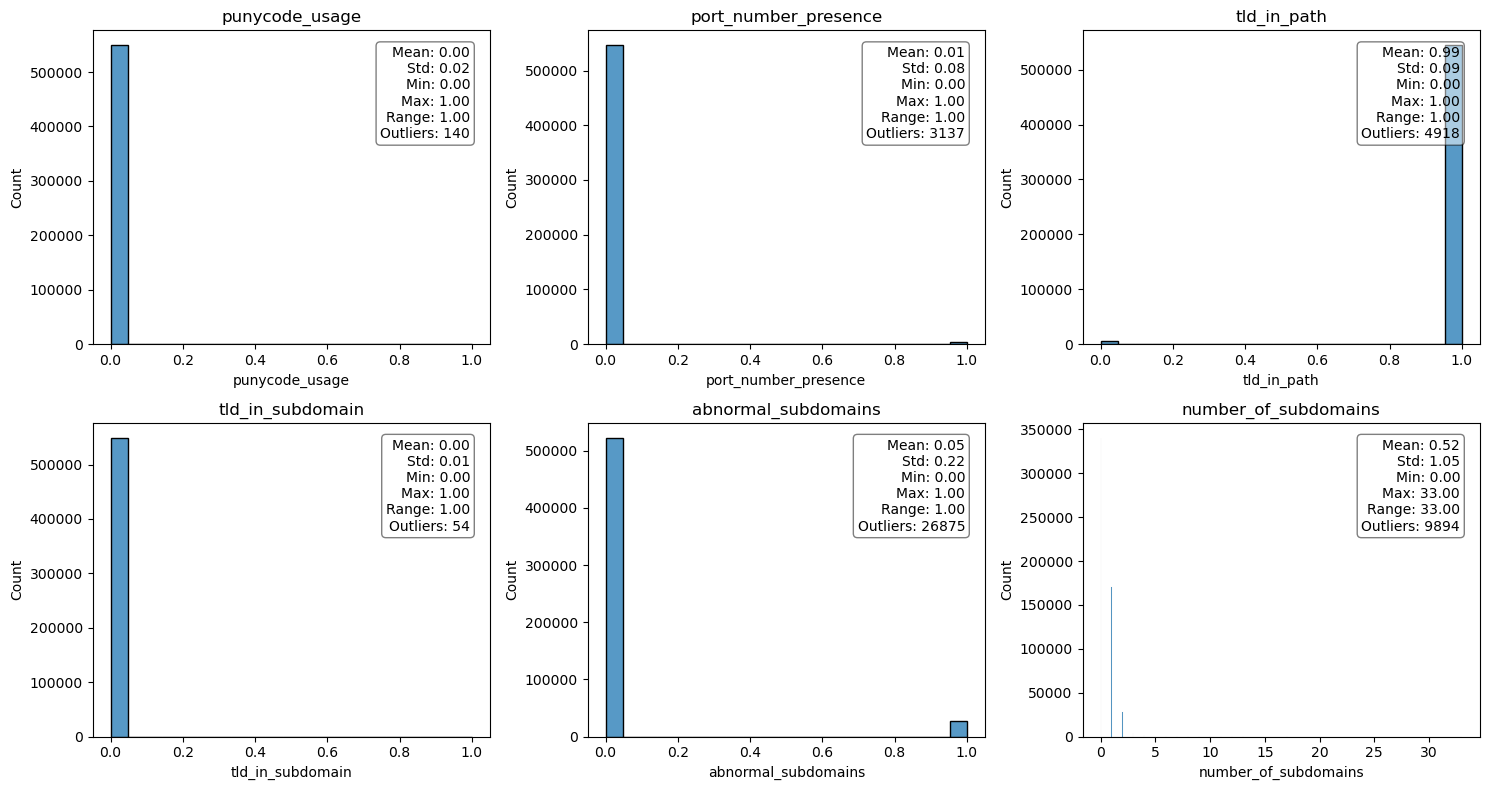

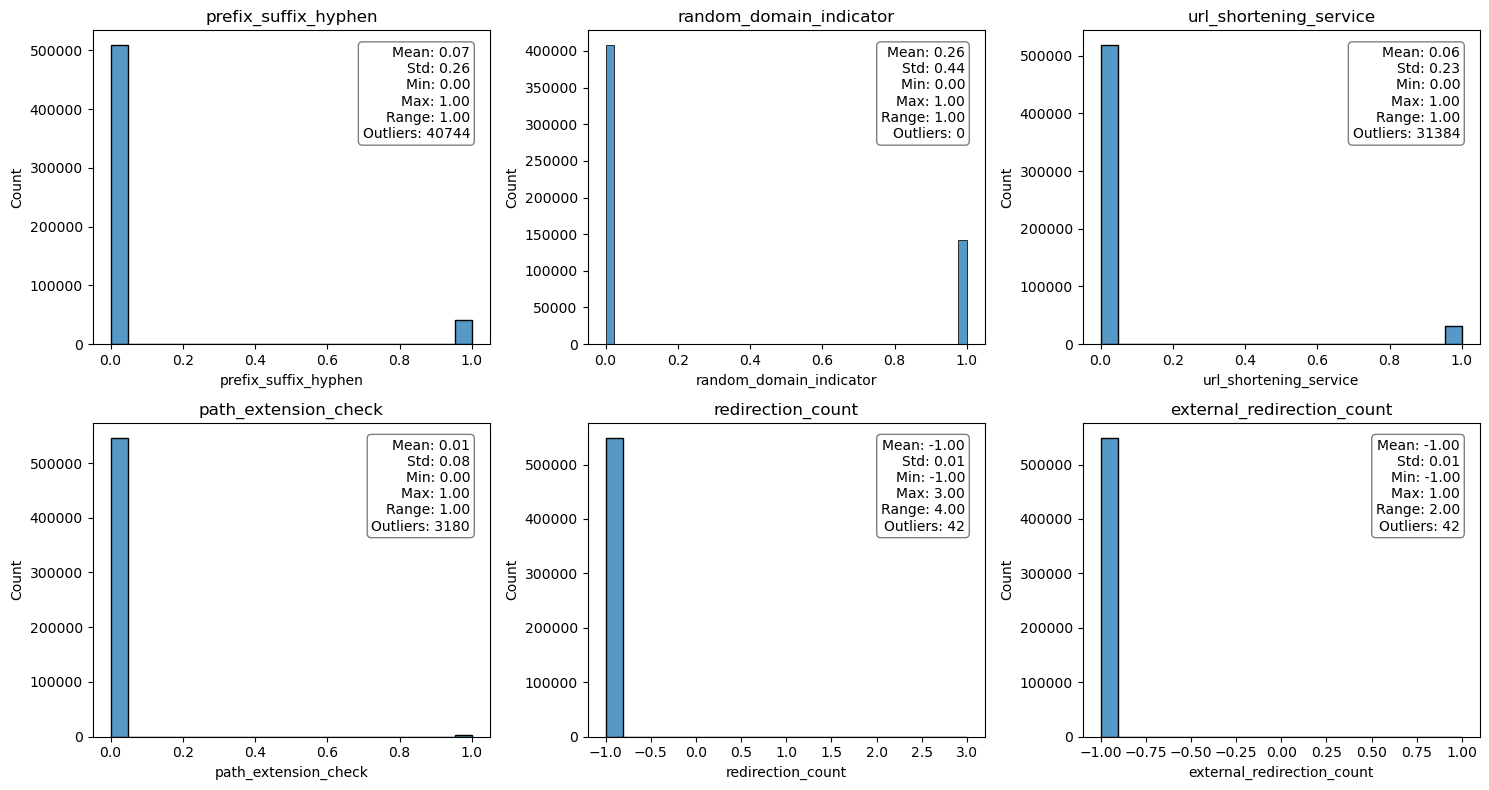

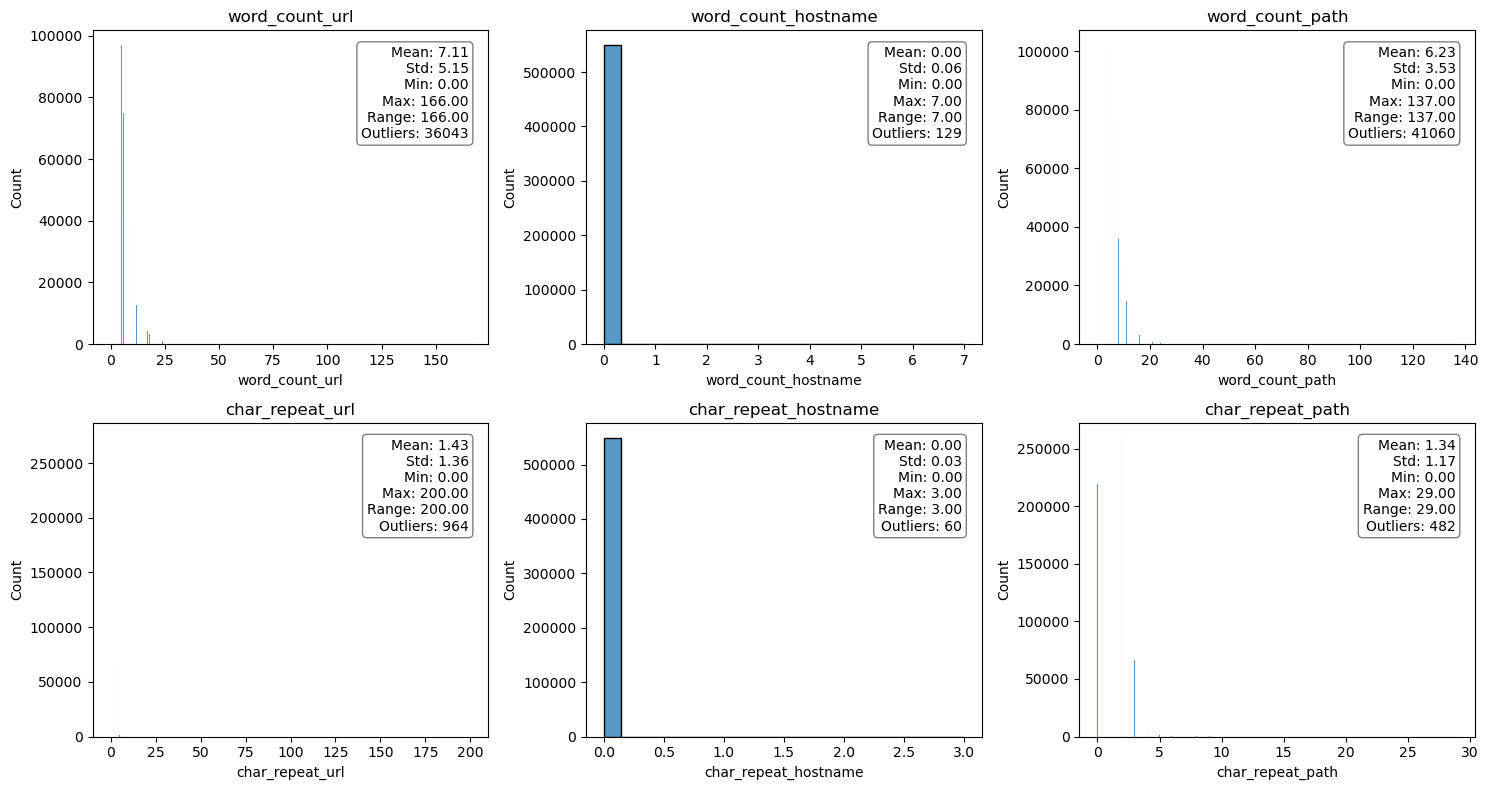

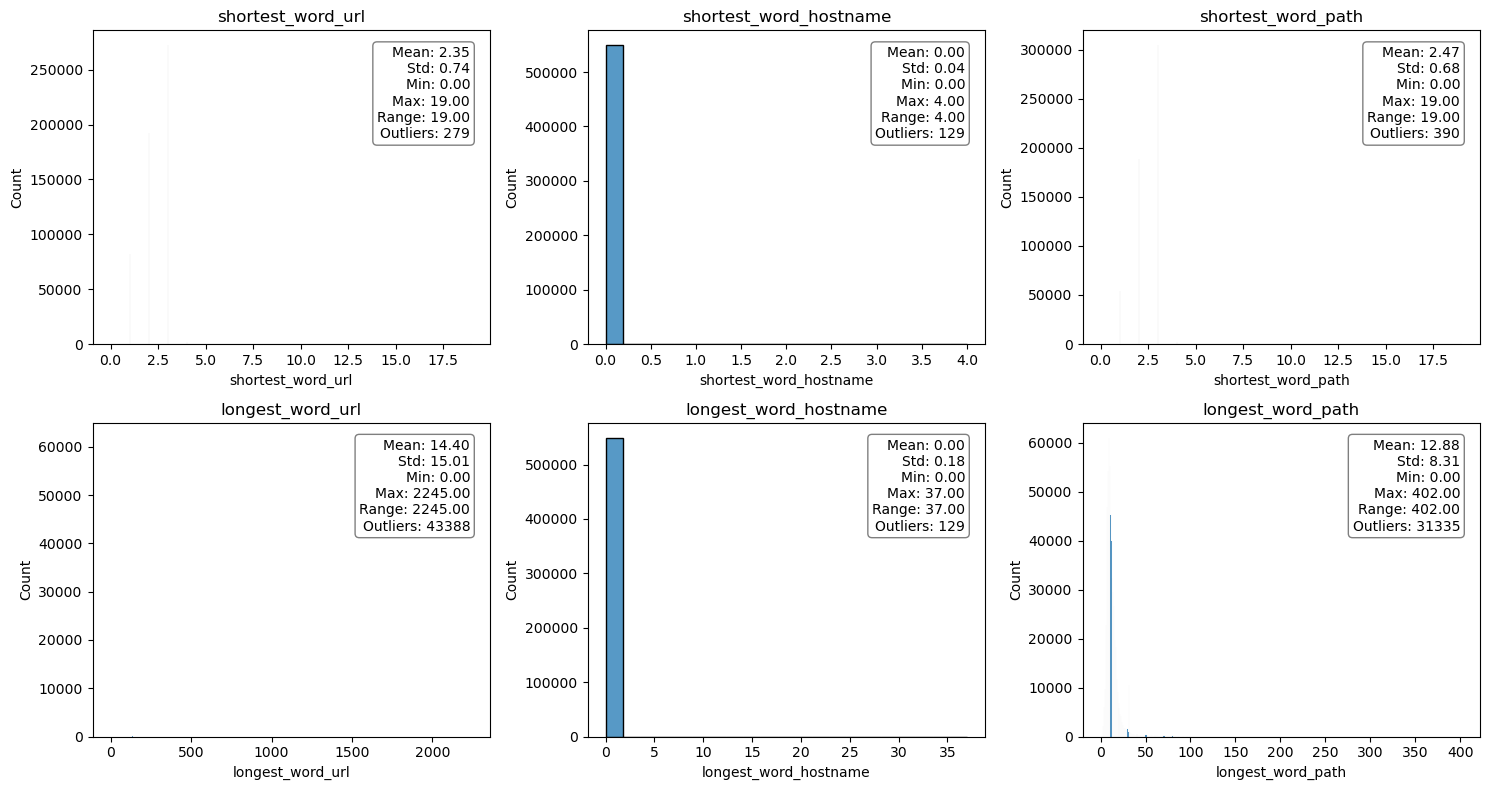

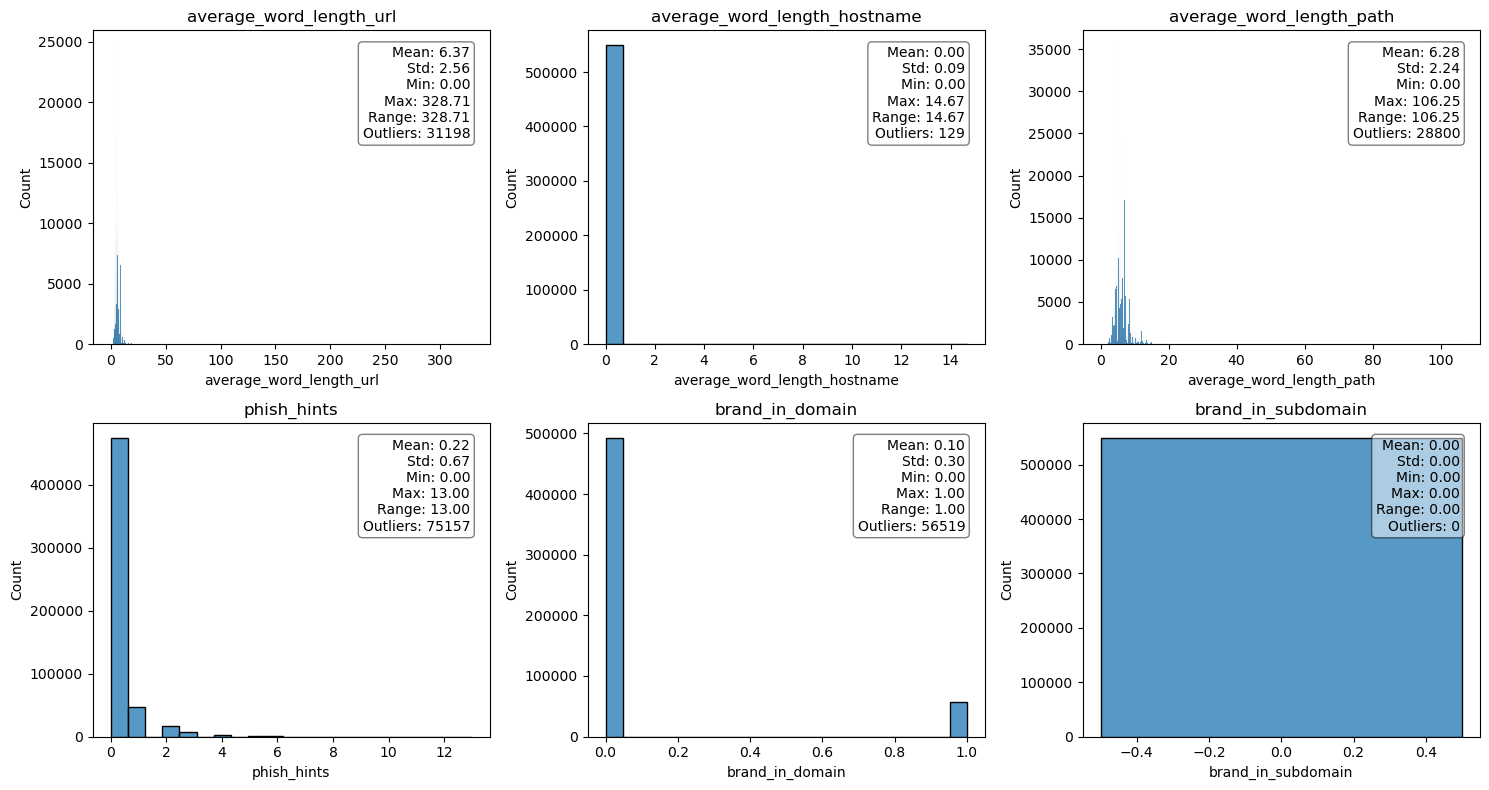

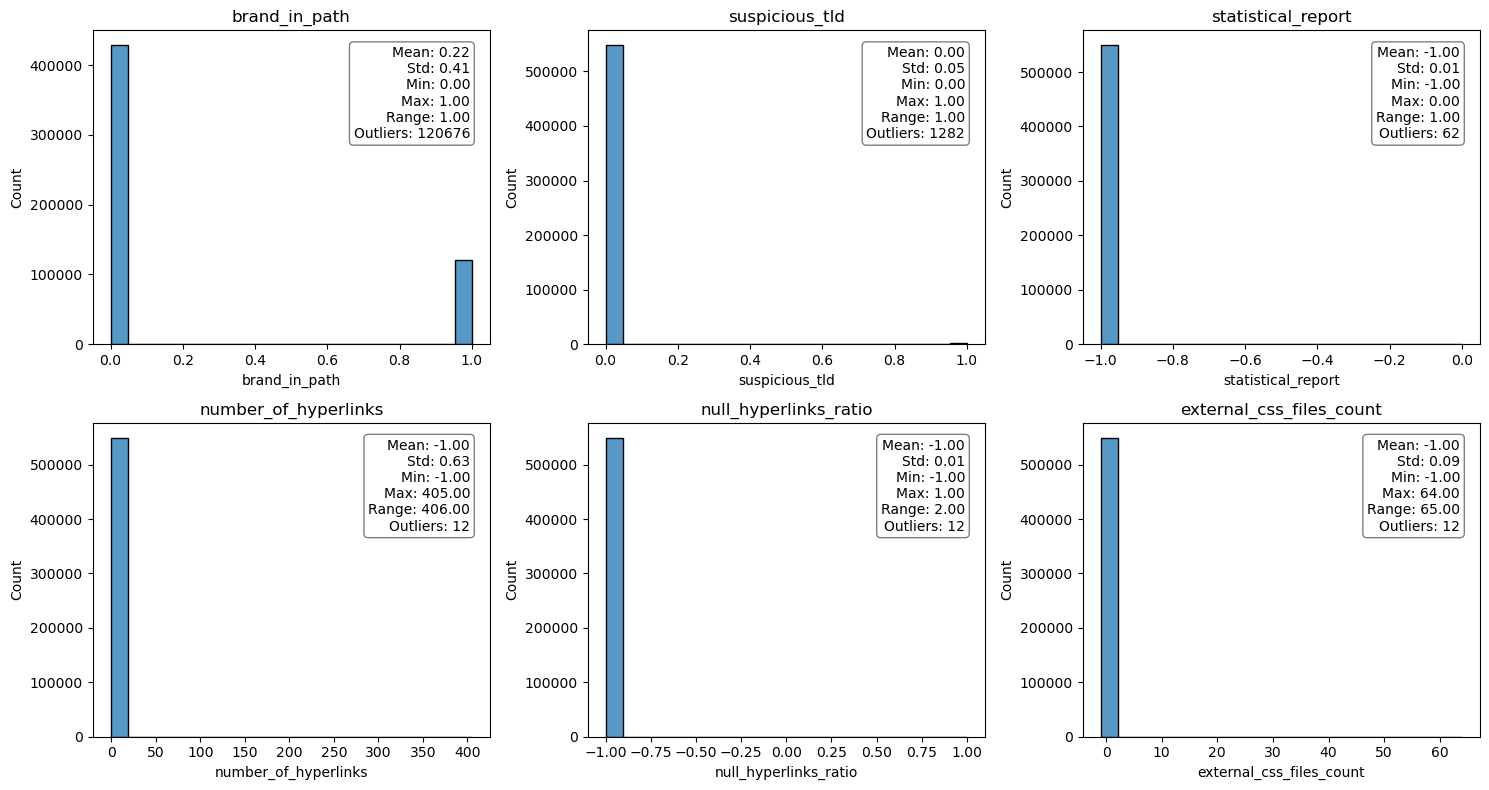

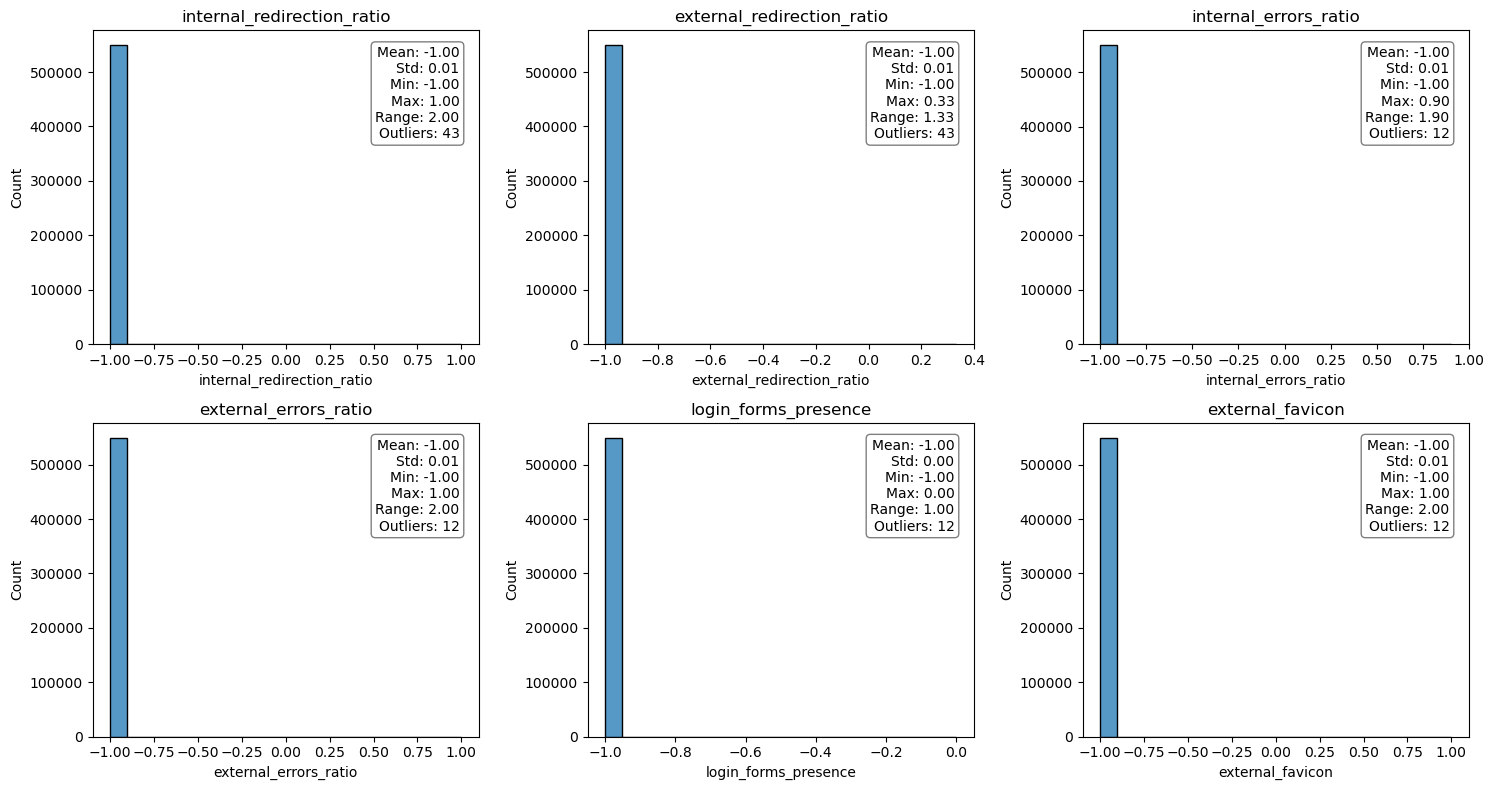

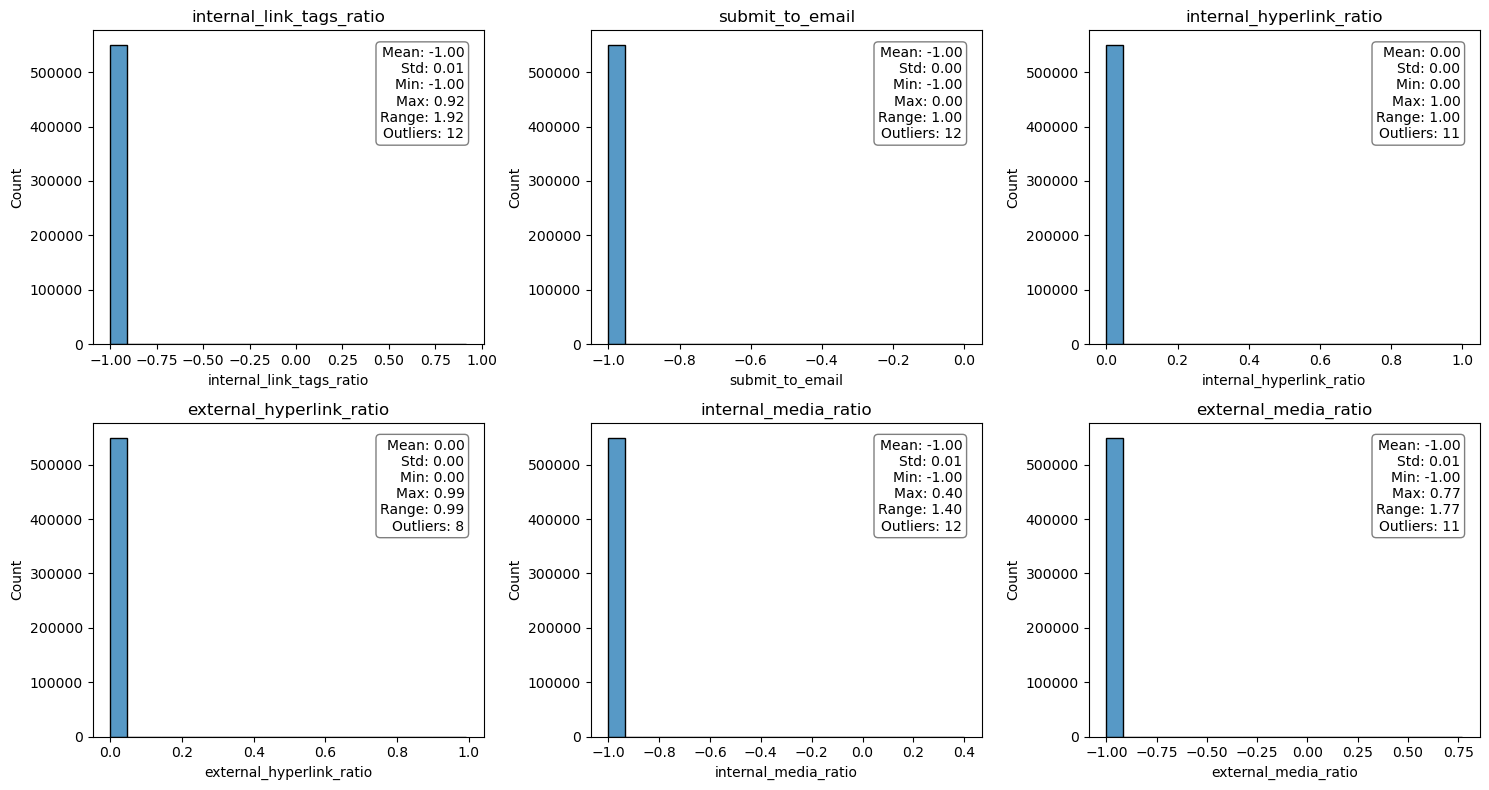

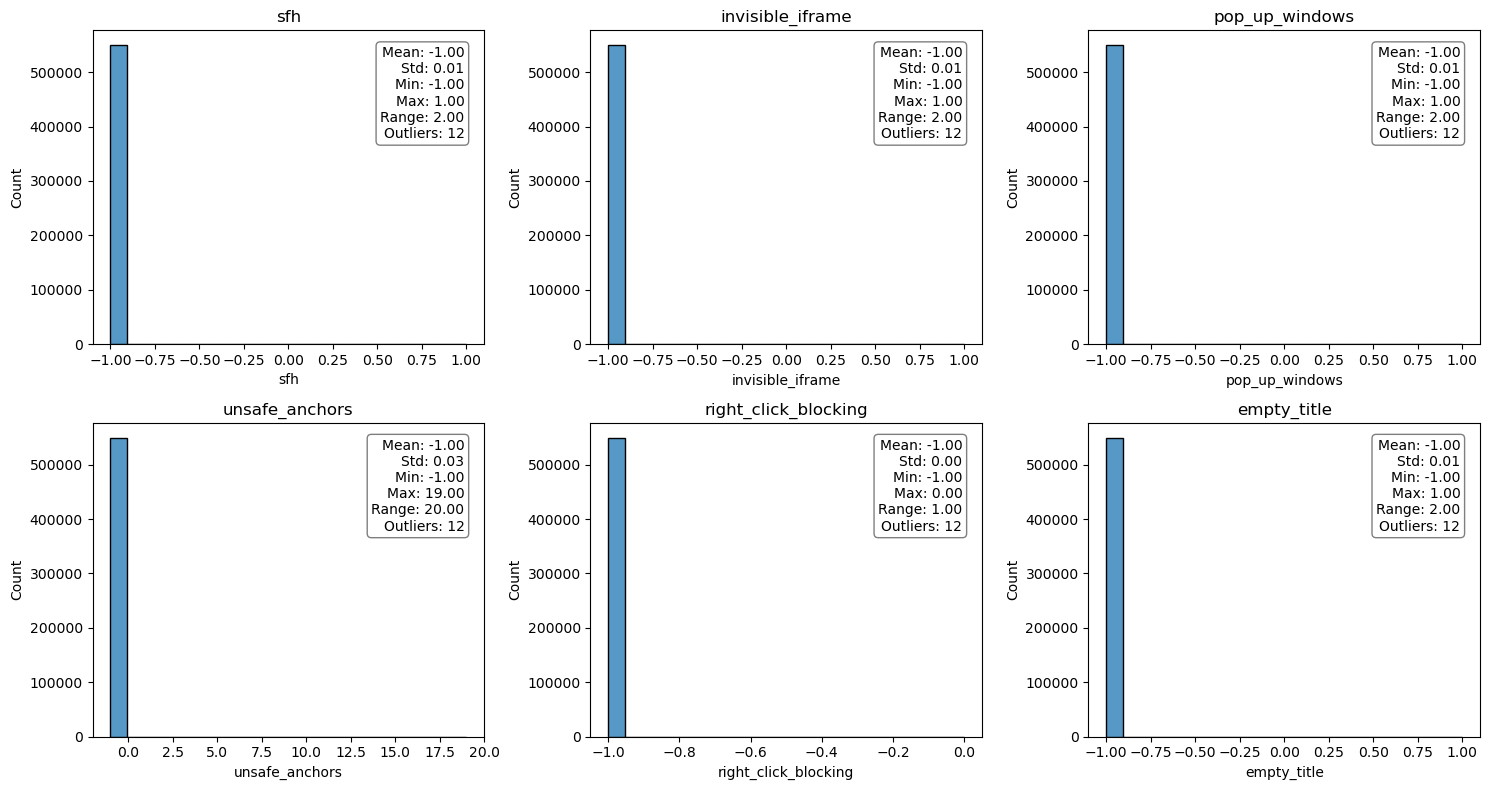

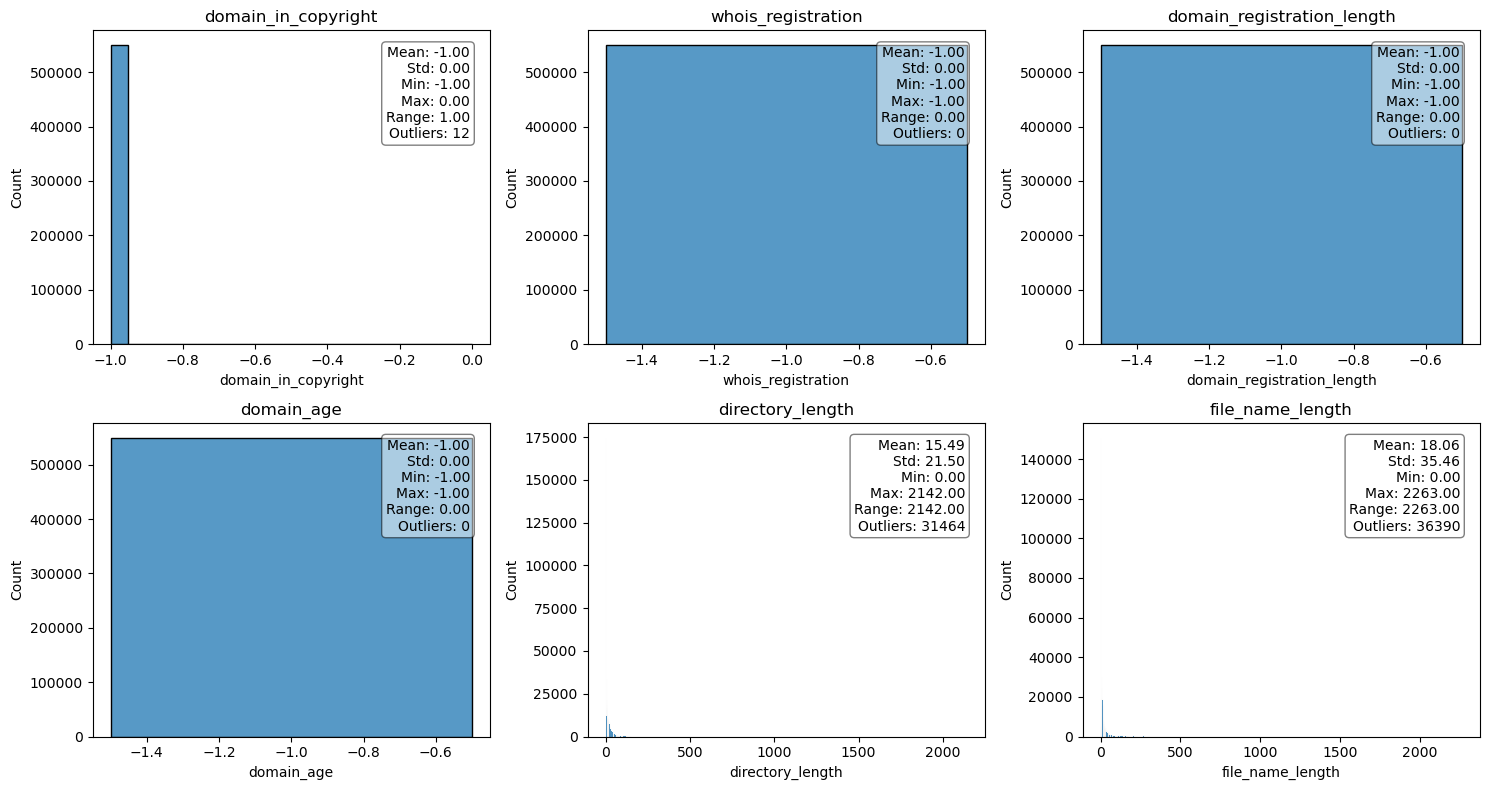

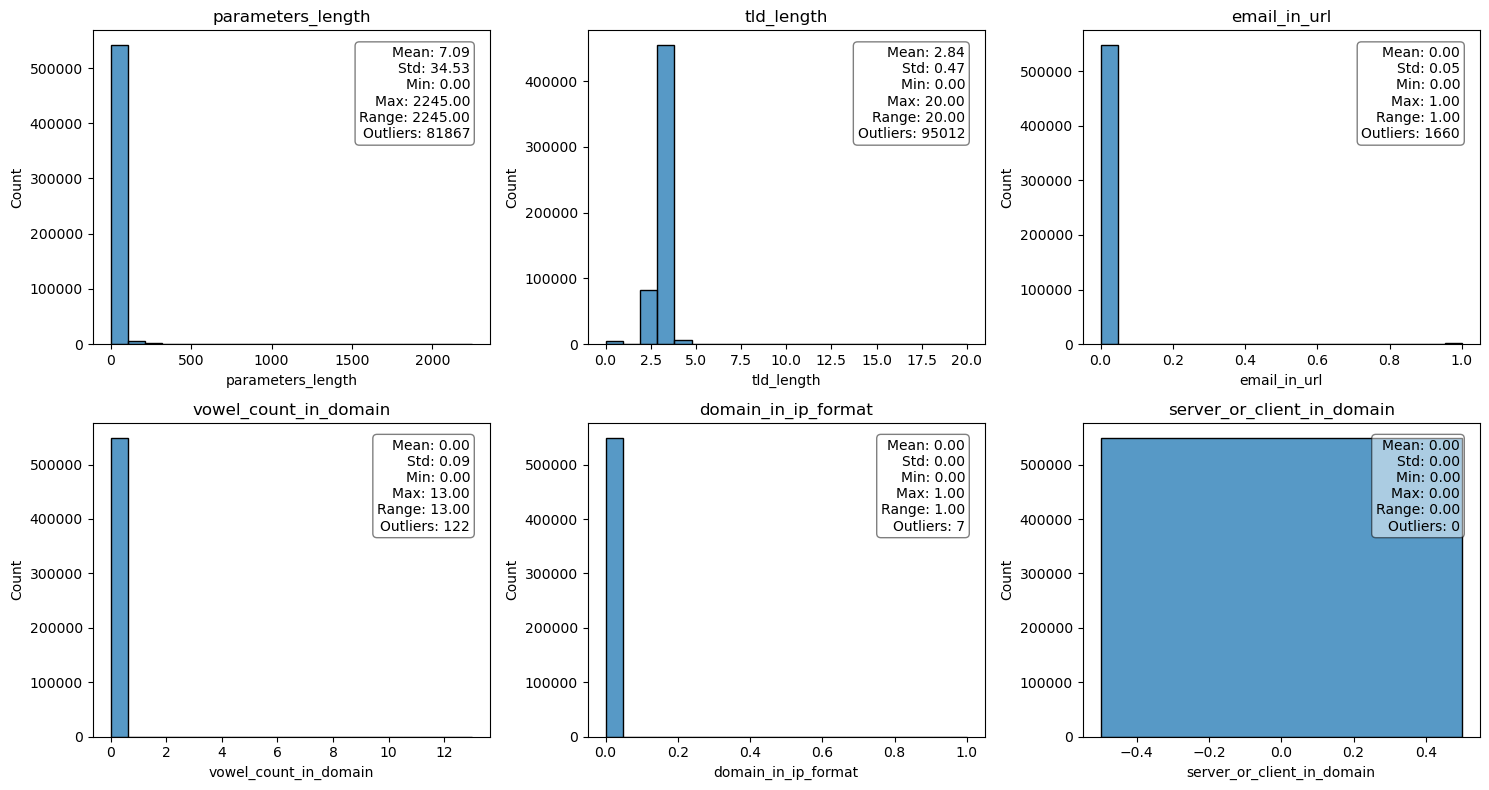

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_feature_distributions(df, nrows=5, ncols=5):
    features = df.columns
    plots_per_fig = nrows * ncols
    total_features = len(features)
    
    for start in range(0, total_features, plots_per_fig):
        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
        axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
        
        for i, feature in enumerate(features[start: start + plots_per_fig]):
            ax = axes[i]
            sns.histplot(df[feature], ax=ax)
        
            mean_val = df[feature].mean()
            std_val = df[feature].std()
            min_val = df[feature].min()
            max_val = df[feature].max()
            range_val = max_val - min_val
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count = df[feature][(df[feature] < lower_bound) | (df[feature] > upper_bound)].count()
            stats_text = (f"Mean: {mean_val:.2f}\n"
                          f"Std: {std_val:.2f}\n"
                          f"Min: {min_val:.2f}\n"
                          f"Max: {max_val:.2f}\n"
                          f"Range: {range_val:.2f}\n"
                          f"Outliers: {outliers_count}")
            ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
            ax.set_title(feature)
        for j in range(i + 1, plots_per_fig):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
plot_feature_distributions(features_df, nrows=2, ncols=3)

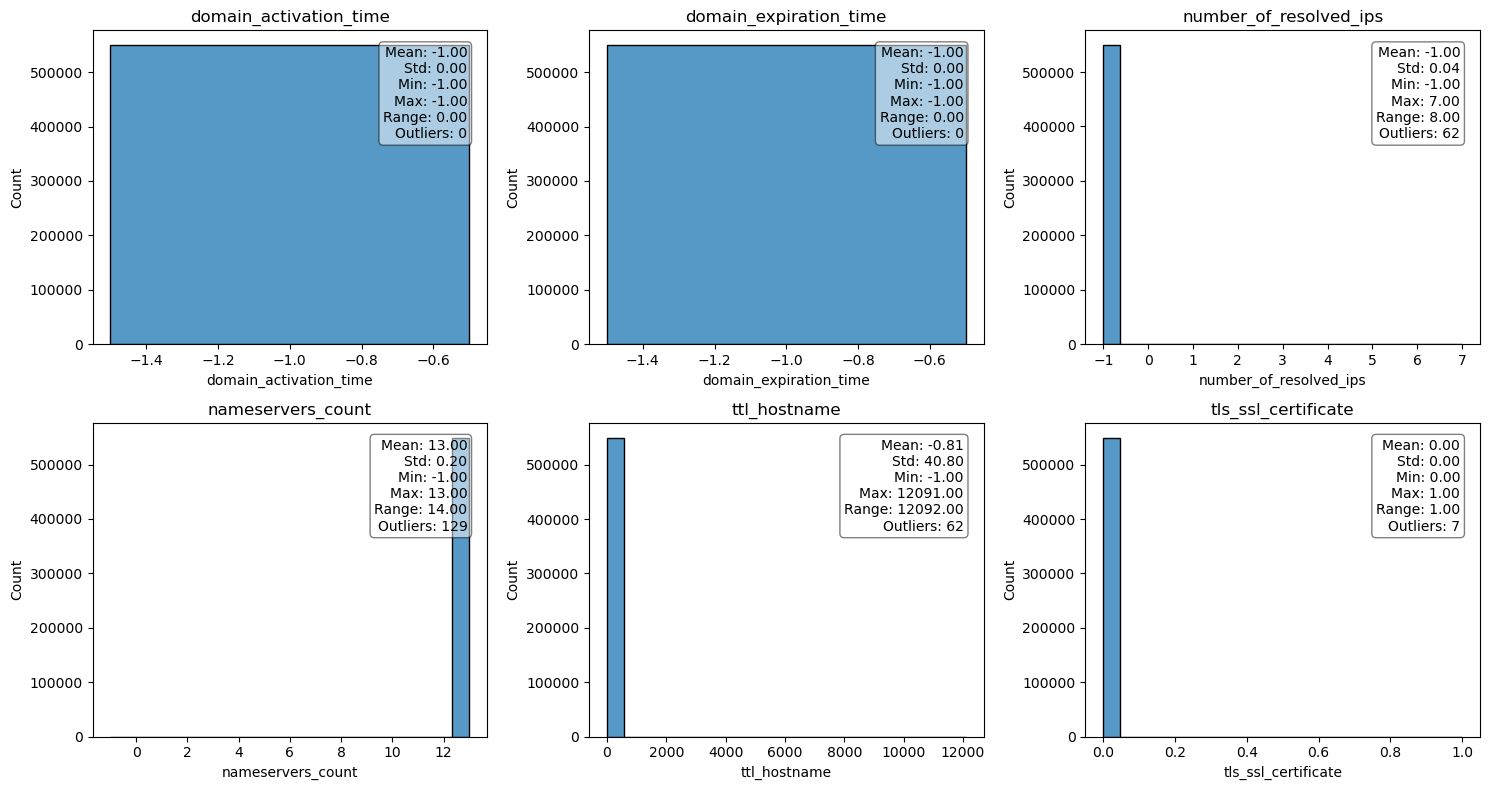

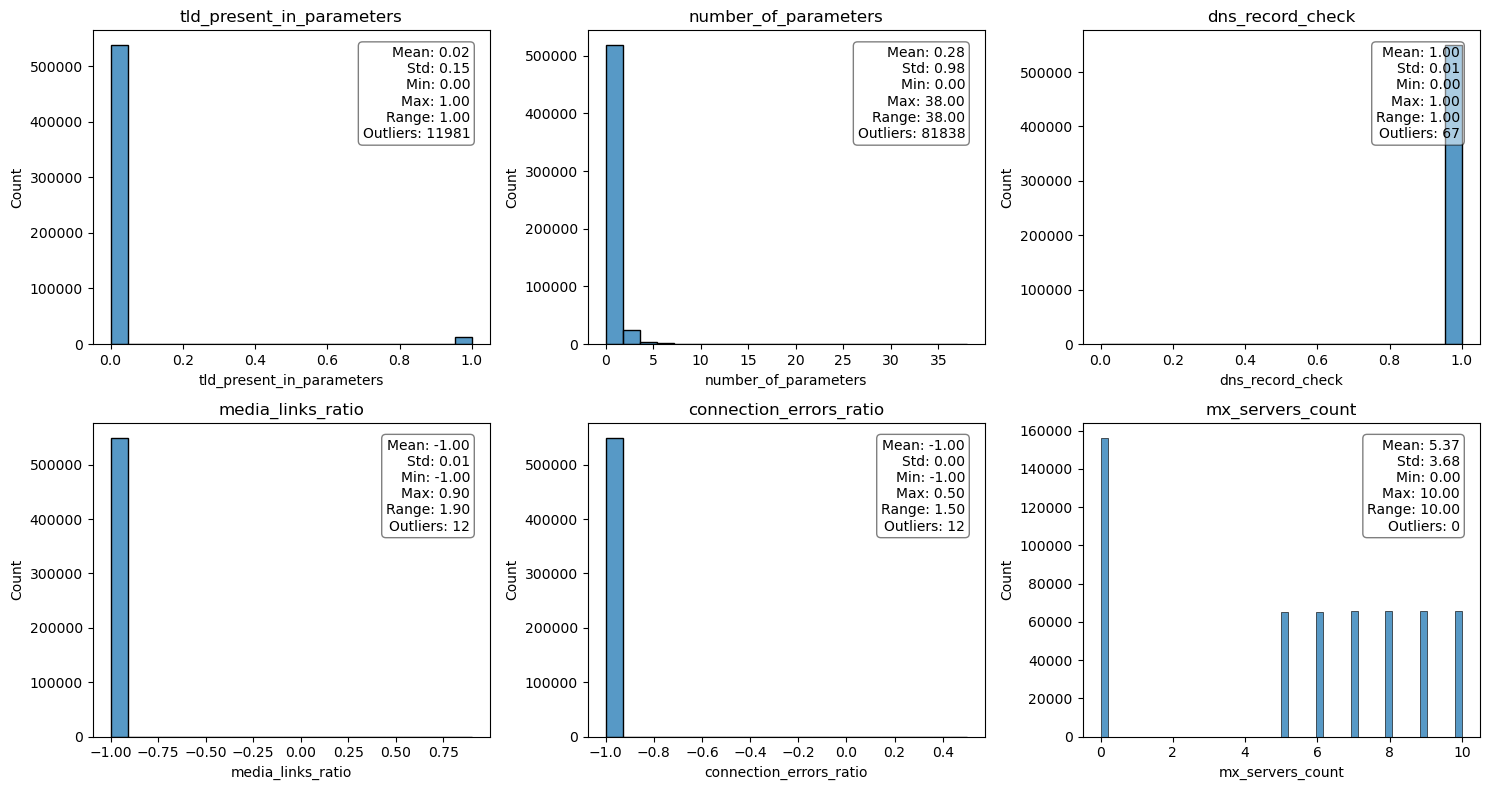

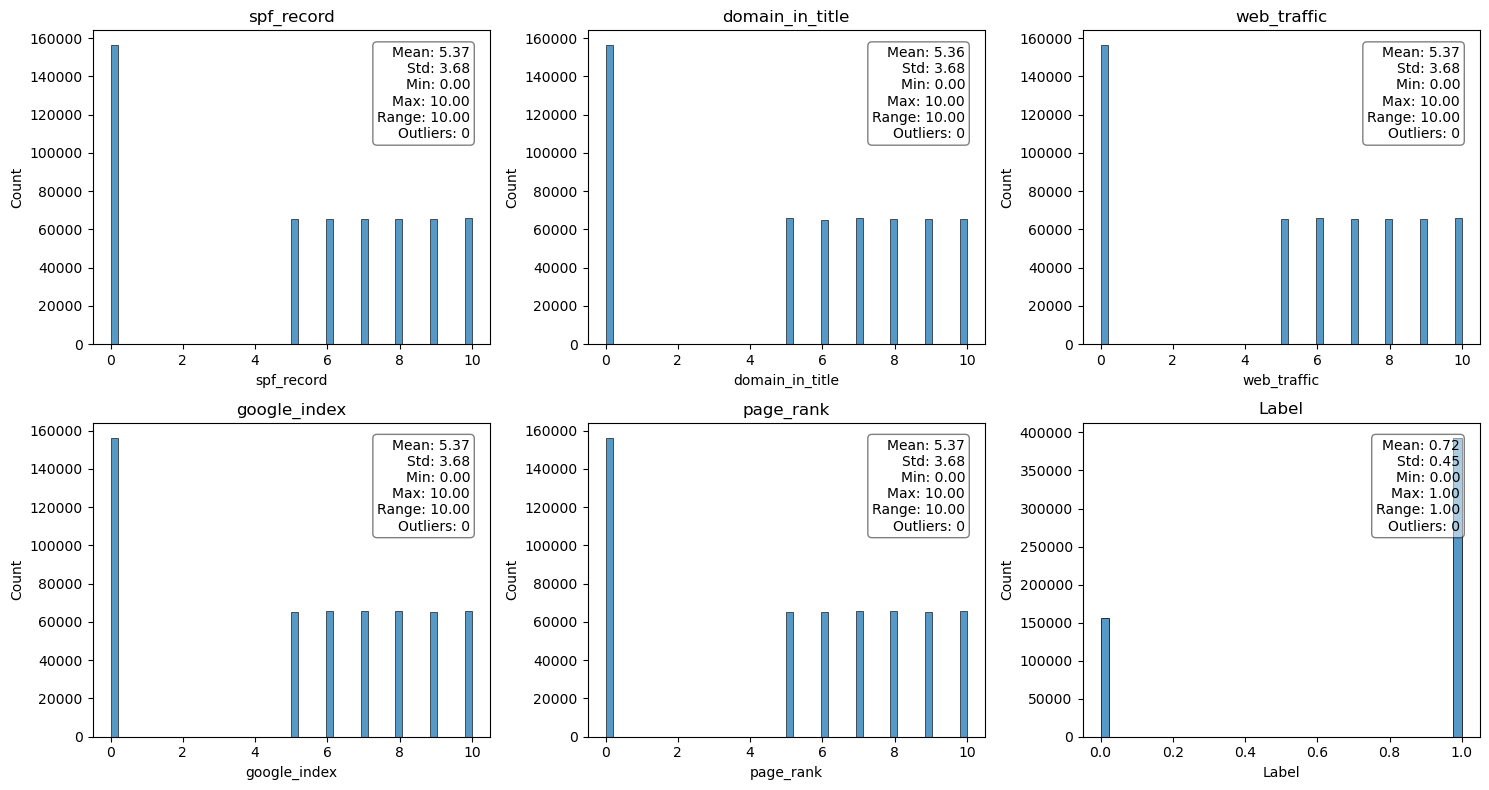

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_feature_distributions(df, start_col="asn", nrows=5, ncols=5):
    # Find the index of the specified column
    if start_col in df.columns:
        start_idx = df.columns.get_loc(start_col) + 1  # Get next column index
    else:
        print(f"Column '{start_col}' not found. Using full dataframe.")
        start_idx = 0  # Use all columns if not found

    # Select only the columns after the specified column
    df = df.iloc[:, start_idx:]

    features = df.columns
    plots_per_fig = nrows * ncols
    total_features = len(features)
    
    for start in range(0, total_features, plots_per_fig):
        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
        axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
        
        for i, feature in enumerate(features[start: start + plots_per_fig]):
            ax = axes[i]
            sns.histplot(df[feature], ax=ax)
        
            mean_val = df[feature].mean()
            std_val = df[feature].std()
            min_val = df[feature].min()
            max_val = df[feature].max()
            range_val = max_val - min_val
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count = df[feature][(df[feature] < lower_bound) | (df[feature] > upper_bound)].count()
            
            stats_text = (f"Mean: {mean_val:.2f}\n"
                          f"Std: {std_val:.2f}\n"
                          f"Min: {min_val:.2f}\n"
                          f"Max: {max_val:.2f}\n"
                          f"Range: {range_val:.2f}\n"
                          f"Outliers: {outliers_count}")
            
            ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
            ax.set_title(feature)
        
        # Remove any unused subplots
        for j in range(i + 1, plots_per_fig):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

# Example Usage
plot_feature_distributions(features_df, nrows=2, ncols=3)


In [6]:
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr_matrix = features_df.corr()

# Set a threshold for high correlation
threshold = 0.9

# Find pairs of highly correlated features
high_corr_pairs = set()
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_pairs.add((col1, col2))
            to_drop.add(col2)  # Drop one of the correlated features

# Print columns to drop
print("Columns to drop due to high correlation:", to_drop)

# Drop the selected columns
features_df_reduced = features_df.drop(columns=to_drop)


Columns to drop due to high correlation: {'connection_errors_ratio', 'internal_link_tags_ratio', 'sfh', 'nameservers_count', 'pop_up_windows', 'internal_redirection_ratio', 'external_favicon', 'internal_media_ratio', 'external_errors_ratio', 'external_redirection_count', 'dns_record_check', 'right_click_blocking', 'external_redirection_ratio', 'internal_errors_ratio', 'domain_in_copyright', 'average_word_length_hostname', 'number_of_parameters', 'vowel_count_in_domain', 'unsafe_anchors', 'media_links_ratio', 'login_forms_presence', 'Label', 'empty_title', 'invisible_iframe', 'submit_to_email', 'longest_word_hostname', 'external_media_ratio'}
